<a href="https://colab.research.google.com/github/VedantWani/Deep-Learning/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AutoEncoder**

In [0]:
import tensorflow as tf


from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Conv2DTranspose, UpSampling2D, Dense, Flatten, Softmax
from tensorflow import keras


import matplotlib.pyplot as plt
import numpy as np


In [0]:
tf.config.experimental.list_physical_devices('GPU')



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[...,tf.newaxis] / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def show_image(image,figsize):
  plt.figure(figsize=figsize)
  ax = plt.subplot(1,1,1)
  plt.imshow(image.squeeze(-1))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()



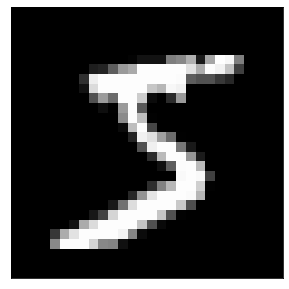

In [0]:
show_image(x_train[0], figsize=(10,5))

In [0]:
noise_scale = 0.5

x_train_noise  = x_train + noise_scale * np.random.standard_normal(size=x_train.shape)
x_test_noise  = x_test + noise_scale * np.random.standard_normal(size=x_test.shape)

x_train_noise = x_train_noise.clip(min = 0., max = 1.)
x_test_noise = x_test_noise.clip(min = 0., max=1.)

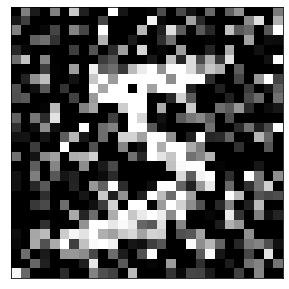

In [0]:
show_image(x_train_noise[0], figsize=(20,5))

In [0]:
tf.keras.backend.set_floatx('float64')

In [0]:
class Encoder(Model):
  def __init__(self):
    super(Encoder, self).__init__()
    self.conv1 = Conv2D(16,(3,3), activation='relu', padding = "same") 
    self.maxpool = MaxPool2D((2,2), strides = 2) 
    self.conv2 = Conv2D(32,(3,3), activation = 'relu', padding = "same") 
    self.conv3 = Conv2D(64,(3,3), activation = 'relu', padding = "same") 
    self.conv4 = Conv2D(128,(3,3), padding = "same") 
    
  

  def call(self,x):
    x = self.conv1(x)#28*28*16
    x = self.maxpool(x)#14*14*16
    x = self.conv2(x)#14*14*32
    x = self.maxpool(x)#7*7*32
    x = self.conv3(x)#7*7*64
    x = self.maxpool(x)#3*3*64
    x = self.conv4(x)#3*3*128
  
    
    
    return x


In [0]:
class Decoder(Model):
  def __init__(self):
    super(Decoder, self).__init__()
   
    self.conv1 = Conv2D(128, (1,1), activation='relu', padding = 'same', strides =2)
    self.upsample = UpSampling2D((2,2))
    self.conv2 = Conv2D(64, (3,3), activation='relu', padding = 'same')
    self.conv3 = Conv2D(16, (3,3), activation='relu', padding = 'same')
    self.conv4 = Conv2D(16, (3,3), activation = 'relu', padding = 'same')
    self.conv5 = Conv2D(8, (3,3), activation = 'relu', padding = 'same')
    self.conv6 = Conv2D(1,(5,5), activation = 'sigmoid')
    

  def call(self,x):
    x = self.conv1(x) #2*2*256
    x = self.upsample(x) #4*4*256
    x = self.conv2(x) #4*4*128
    x = self.upsample(x) #8*8*128
    x = self.conv3(x) #8*8*64
    x = self.upsample(x) #16*16*64
    x = self.conv4(x) #16*16*8
    x = self.upsample(x) #32*32*8
    x = self.conv5(x) #32*32*4
    x = self.conv6(x)
    return x

In [0]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encode = Encoder()
    self.decode = Decoder()
  
  def call(self,x):
    x = self.encode(x)
    x = self.decode(x)
    

    return x



In [0]:
model = AutoEncoder()

In [0]:
optimizer =  keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer=optimizer,loss='binary_crossentropy')

In [0]:
history = model.fit(x_train_noise, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, x_test)
                )

Epoch 1/200
469/469 [==============================] - 6s 13ms/step - loss: 0.1973 - val_loss: 0.1353
Epoch 2/200
469/469 [==============================] - 6s 12ms/step - loss: 0.1279 - val_loss: 0.1206
Epoch 3/200
469/469 [==============================] - 6s 12ms/step - loss: 0.1175 - val_loss: 0.1155
Epoch 4/200
469/469 [==============================] - 6s 12ms/step - loss: 0.1121 - val_loss: 0.1108
Epoch 5/200
469/469 [==============================] - 6s 12ms/step - loss: 0.1087 - val_loss: 0.1071
Epoch 6/200
469/469 [==============================] - 6s 12ms/step - loss: 0.1064 - val_loss: 0.1047
Epoch 7/200
469/469 [==============================] - 6s 12ms/step - loss: 0.1046 - val_loss: 0.1032
Epoch 8/200
469/469 [==============================] - 6s 12ms/step - loss: 0.1032 - val_loss: 0.1026
Epoch 9/200
469/469 [==============================] - 6s 12ms/step - loss: 0.1021 - val_loss: 0.1014
Epoch 10/200
469/469 [==============================] - 6s 12ms/step - loss: 0.101

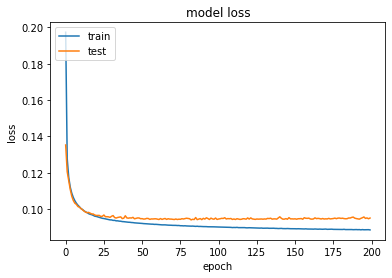

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

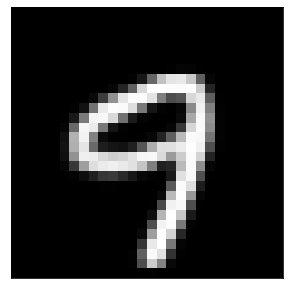

In [0]:
prediction = model.predict(x_test_noise[58].reshape(1,28,28,1))
show_image(prediction.reshape(28,28,1), (20,5))

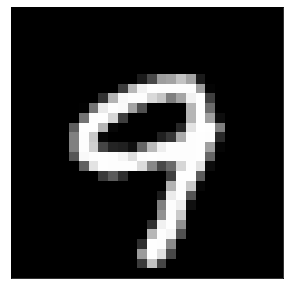

In [0]:
show_image(x_test[58], (20,5))

In [0]:
encoder = model.get_layer(index=0)

In [0]:
encoder.save_weights("/content/")

## **Classifier**
Input: Noisy Image

output: classification of digit

In [0]:
class Classifier(Model):
  def __init__(self):
    super(Classifier, self).__init__()
    self.encoder = Encoder()
    self.encoder.load_weights("/content/")
    self.encoder.trainable = False
    self.clas = keras.Sequential([ 
                                   Flatten(input_shape=(3,3,128)),
                                   Dense(128, activation = 'relu'),
                                   Dense(10),           
    ])
    
  
  def call(self,x):
    x = self.encoder(x)
    x = self.clas(x)
    

    return x


In [0]:
classifier = Classifier()
optimizer =  keras.optimizers.Adam(lr=1e-3)
classifier.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = classifier.fit(x_train_noise, y_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, y_test)
                )

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1767 - accuracy: 0.9447 - val_loss: 0.1103 - val_accuracy: 0.9631
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1007 - accuracy: 0.9669 - val_loss: 0.1165 - val_accuracy: 0.9627
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0820 - accuracy: 0.9736 - val_loss: 0.0986 - val_accuracy: 0.9696
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0710 - accuracy: 0.9770 - val_loss: 0.0934 - val_accuracy: 0.9696
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0629 - accuracy: 0.9795 - val_loss: 0.0967 - val_accuracy: 0.9695


In [0]:
prediction_cls = classifier.predict(x_test_noise)
np.argmax(prediction_cls[0])

7

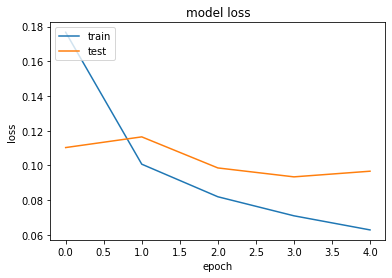

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

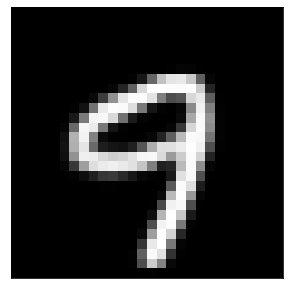

In [0]:
show_image(prediction.reshape(28,28,1), (20,5))

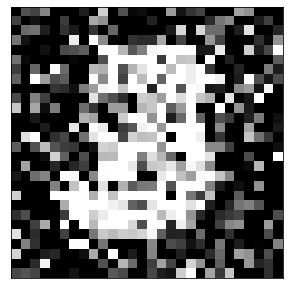

In [0]:
show_image(x_test_noise[200], (20,5))

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28,28))

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                               true_label),
                                color=color)

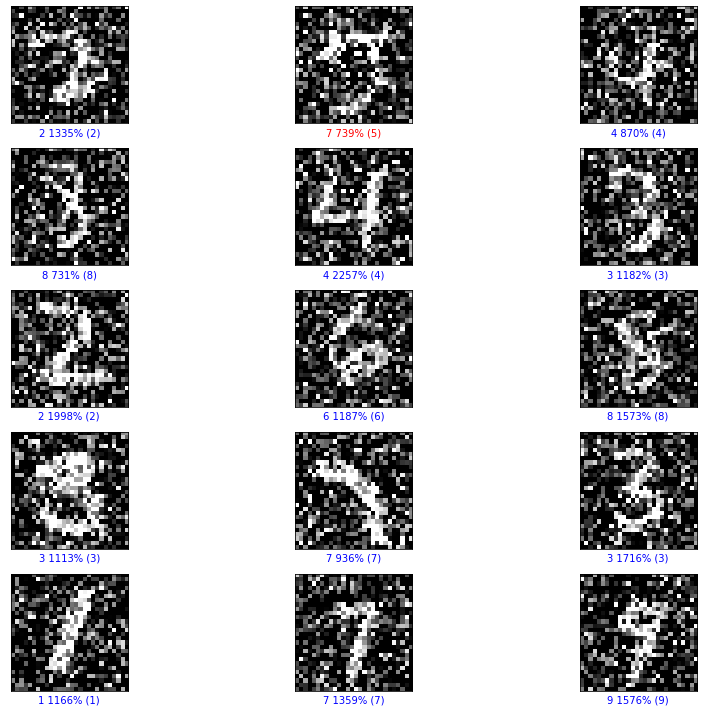

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
rand = np.random.randint(0, x_test_noise.shape[0], num_images)
j = 0
for i in rand :
  
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, prediction_cls[i], y_test, x_test_noise)
  j += 1
 
plt.tight_layout()
plt.show()